In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('gender_classification.csv')

In [3]:
data.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male


In [4]:
data.tail(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [5]:
data.shape

(5001, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isna()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [10]:
data.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [11]:
data['forehead_width_cm'] = data['forehead_width_cm'].astype(int)

In [12]:
data['forehead_height_cm'] = data['forehead_height_cm'].astype(int)

In [13]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
dict_a = {'Male':0, 'Female':1}

In [15]:
data['gender'] = data['gender'].map(dict_a)

In [16]:
dict_a

{'Male': 0, 'Female': 1}

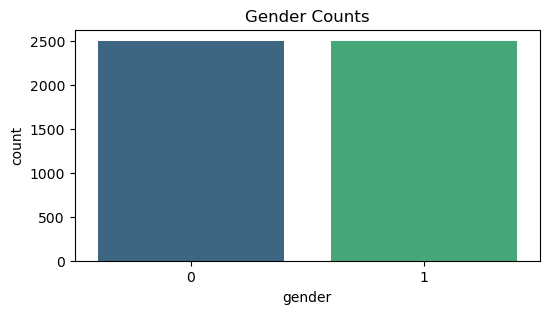

In [17]:
plt.figure(figsize=(6, 3))
plt.title('Gender Counts')
sns.countplot(x=data['gender'], palette='viridis')
plt.show()

# Ml Model Building

In [18]:
from sklearn.feature_selection import mutual_info_classif

In [19]:
X = data.drop('gender', axis=1)
y = data['gender']

In [20]:
imp_df=pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

In [21]:
imp_df.to_csv('imp_df')
a=pd.read_csv('imp_df')
a

,Unnamed: 0,0
0,long_hair,0.006886
1,forehead_width_cm,0.062218
2,forehead_height_cm,0.034540
3,nose_wide,0.316632
4,nose_long,0.309846
5,lips_thin,0.315293
6,distance_nose_to_lip_long,0.320611


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
prediction = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.965034965034965


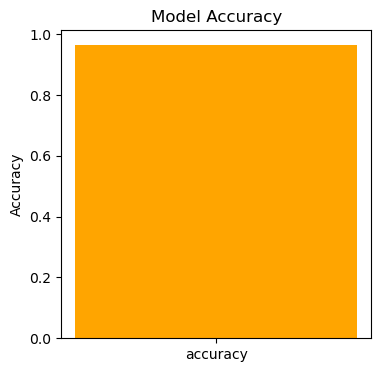

In [25]:
plt.figure(figsize=(4, 4))
plt.bar(["accuracy"], [accuracy], color='orange')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()